In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [3]:
X1 = df["Chirps/Second"]
a = X1 - X1.mean()

In [4]:
actual = df["Ground Temperature"]

In [5]:
b = actual - actual.mean()

In [6]:
a = a.values.reshape(-1,1)

In [7]:
a.shape

(15, 1)

In [8]:
b = b.values.reshape(-1,1)

In [9]:
b.shape

(15, 1)

In [10]:
b1_num = (a*b).sum()
b1_num

140.07333333333332

In [11]:
den = (a**2).sum()
den

41.07333333333332

In [12]:
b1 = b1_num/den
b1

3.410322999513067

### 1 .Find the linear regression equation for this data.

In [13]:
#regression equation for this data.
b0 = actual.mean() - b1 * X1.mean()
b0

22.848982308066844

In [14]:
X1 = X1.values.reshape(-1,1)

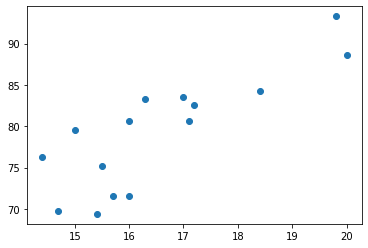

In [15]:
from matplotlib import pyplot as plt
plt.scatter(X1,actual)

### 2.Chart the original data and the equation on the chart.

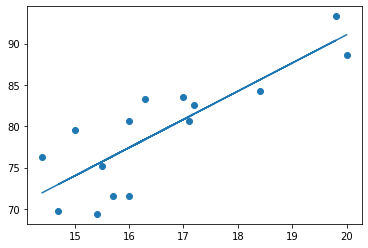

In [16]:
plt.scatter(X1,actual)
plt.plot(X1,b0+ b1 * X1)

In [17]:
X=df['Chirps/Second']
Y=df['Ground Temperature']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [20]:
X_train = X_train.values.reshape(-1,1)

In [21]:
y_train = y_train.values.reshape(-1,1)

In [22]:
X_test = X_test.values.reshape(-1,1)

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
pred=lm.predict(X_test)

### 3.Find the equation's  𝑅2  score

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8323283431146269

### 5.Interpolate data

In [26]:
lm.predict([[18]])

array([[84.70555847]])

In [27]:
lm.fit(y_train,X_train)

LinearRegression()

### 4.Extrapolate data

In [28]:
lm.predict([[95]])

array([[19.28879902]])

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [29]:
brbody= pd.read_fwf("brain_body.txt")

In [30]:
brbody.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [31]:
brbody.isnull().sum()

Brain    0
Body     0
dtype: int64

In [32]:
brbody.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [33]:
def detect_outliers(data):
    outlier=[]
    threshold=1
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [34]:
a=detect_outliers(brbody["Brain"])
b=detect_outliers(brbody["Body"])

In [35]:
a

[2547.0, 6654.0]

In [36]:
brbody["Brain"] = brbody["Brain"].replace([a],198.789)
brbody["Body"] = brbody["Body"].replace([b],283.134194)

In [37]:
brbody.describe()

,Brain,Body
count,62.000000,62.000000
mean,56.799306,109.172945
std,120.365721,167.202749
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,529.000000,680.000000


In [38]:
brbody.dtypes

Brain    float64
Body     float64
dtype: object

In [39]:
brbody = brbody.drop_duplicates()

In [40]:
brbody['Body']

0      44.5
1      15.5
2       8.1
3     423.0
4     119.5
      ...  
57    169.0
58      2.6
59     11.4
60      2.5
61     50.4
Name: Body, Length: 61, dtype: float64

In [41]:
X=brbody['Brain']
Y=brbody['Body']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [43]:
y_train = y_train.values.reshape(-1,1)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [44]:
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
brbody['Body'].dtype

dtype('float64')

### Find the linear regression equation for this data for brain weight to body weight.

In [46]:
model.intercept_

array([35.31029814])

In [47]:
model.coef_

array([[1.17383069]])

### Chart the original data and the equation on the chart

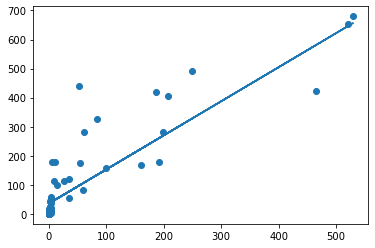

In [48]:
plt.scatter(brbody['Brain'],brbody['Body'])
plt.plot(brbody['Brain'],model.intercept_[0]+ model.coef_[0]* brbody['Brain'])

In [49]:
pred=model.predict(X_test)

### Find the equation's  𝑅2  score

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.8098306552560195

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [51]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [52]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [53]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [54]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [55]:
df.drop_duplicates()
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [56]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [57]:
X = df[[ 'Rank', 'Year','YSdeg']].values
y = df['Salary'].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Find the linear regression equation for this data using columns 1-5 to column 6

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
pred=regressor.predict(X_test)

### Find the selection of columns with the best  𝑅2  score.

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.7012109096135268

### Report whether sex is a factor in salary

#### .                        no its not... even in corr its -0.25 its totaly depends on Rank , Year and YSdeg adding Sex as one features its only reduceing a accuracy of my model so its safe to say sex is not factor in salary